# Figure 4 (NLP 2023.6)

In [1]:
import os
import numpy as np
import pickle

from config import MRI8_NVF4_10mm_0p2mmVVV as cfg1
from config import MRI8_NVF4_10mm_0p0mmVVV as cfg2
from config import MRI8_NVF4_10mm_0p0mmVVVV as cfg3

os.chdir('../')
from lib.methods import *
from lib.figure import NLP

os.chdir('../')

## Load data

In [2]:
[mic_t_data1, mic_data1] = LoadCSV(
                                file_path=cfg1.CSV_FILE_DIR+cfg1.DATA_NAME+cfg1.ADDITIONAL_PATH+'.csv', 
                                data_name_list=['t', 'mic'], 
                                sample_span=[0, None]
                                )

[mic_t_data2, mic_data2] = LoadCSV(
                                file_path=cfg2.CSV_FILE_DIR+cfg2.DATA_NAME+cfg2.ADDITIONAL_PATH+'.csv', 
                                data_name_list=['t', 'mic'], 
                                sample_span=[0, None]
                                )

[mic_t_data3, mic_data3] = LoadCSV(
                                file_path=cfg3.CSV_FILE_DIR+cfg3.DATA_NAME+cfg3.ADDITIONAL_PATH+'.csv', 
                                data_name_list=['t', 'mic'], 
                                sample_span=[0, None]
                                )

Loading csv data
file path | ./data/VF_FVF_DATASETS/CSV/MRI8_NVF4_10mm_0p2mmVVV.csv
data list | t, mic
Loading csv data
file path | ./data/VF_FVF_DATASETS/CSV/MRI8_NVF4_10mm_0p0mmVVV.csv
data list | t, mic
Loading csv data
file path | ./data/VF_FVF_DATASETS/CSV/MRI8_NVF4_10mm_0p0mmVVVV.csv
data list | t, mic


## Pre-process

In [3]:
PP = PreProcessing_forESN(data=mic_data1, t_data=mic_t_data1)
PP.filter(method=cfg1.FILTER_METHOD, params=cfg1.BANDPASS_PARAMS)
PP.cut(span=cfg1.SAMPLE_SPAN, new_t=False)
PP.embed(n_shift=cfg1.TRAIN_TEST_DATA_PARAMS['n_shift'], 
         n_dimension=cfg1.TRAIN_TEST_DATA_PARAMS['n_dimension'])
train_X1, train_Y1, test_X1, test_Y1 = PP.train_test_split(n_train=cfg1.TRAIN_TEST_DATA_PARAMS['n_train'], 
                                                       n_predstep=cfg1.TRAIN_TEST_DATA_PARAMS['n_predstep'])
train_t1 = PP.t_data[cfg1.TRAIN_TEST_DATA_PARAMS['n_predstep']:cfg1.TRAIN_TEST_DATA_PARAMS['n_predstep']+train_Y1.shape[0]]
test_t1 = PP.t_data[cfg1.TRAIN_TEST_DATA_PARAMS['n_train']+cfg1.TRAIN_TEST_DATA_PARAMS['n_predstep']:cfg1.TRAIN_TEST_DATA_PARAMS['n_train']+cfg1.TRAIN_TEST_DATA_PARAMS['n_predstep']+test_Y1.shape[0]]

PP = PreProcessing_forESN(data=mic_data1, t_data=mic_t_data1)
PP.filter(method=cfg2.FILTER_METHOD, params=cfg2.BANDPASS_PARAMS)
PP.cut(span=cfg2.SAMPLE_SPAN, new_t=False)
PP.embed(n_shift=cfg2.TRAIN_TEST_DATA_PARAMS['n_shift'], 
         n_dimension=cfg2.TRAIN_TEST_DATA_PARAMS['n_dimension'])
train_X2, train_Y2, test_X2, test_Y2 = PP.train_test_split(n_train=cfg2.TRAIN_TEST_DATA_PARAMS['n_train'], 
                                                       n_predstep=cfg2.TRAIN_TEST_DATA_PARAMS['n_predstep'])
train_t2 = PP.t_data[cfg2.TRAIN_TEST_DATA_PARAMS['n_predstep']:cfg2.TRAIN_TEST_DATA_PARAMS['n_predstep']+train_Y2.shape[0]]
test_t2 = PP.t_data[cfg2.TRAIN_TEST_DATA_PARAMS['n_train']+cfg2.TRAIN_TEST_DATA_PARAMS['n_predstep']:cfg2.TRAIN_TEST_DATA_PARAMS['n_train']+cfg2.TRAIN_TEST_DATA_PARAMS['n_predstep']+test_Y2.shape[0]]

PP = PreProcessing_forESN(data=mic_data1, t_data=mic_t_data1)
PP.filter(method=cfg3.FILTER_METHOD, params=cfg3.BANDPASS_PARAMS)
PP.cut(span=cfg3.SAMPLE_SPAN, new_t=False)
PP.embed(n_shift=cfg3.TRAIN_TEST_DATA_PARAMS['n_shift'], 
         n_dimension=cfg3.TRAIN_TEST_DATA_PARAMS['n_dimension'])
train_X3, train_Y3, test_X3, test_Y3 = PP.train_test_split(n_train=cfg3.TRAIN_TEST_DATA_PARAMS['n_train'], 
                                                       n_predstep=cfg3.TRAIN_TEST_DATA_PARAMS['n_predstep'])
train_t3 = PP.t_data[cfg3.TRAIN_TEST_DATA_PARAMS['n_predstep']:cfg3.TRAIN_TEST_DATA_PARAMS['n_predstep']+train_Y3.shape[0]]
test_t3 = PP.t_data[cfg3.TRAIN_TEST_DATA_PARAMS['n_train']+cfg3.TRAIN_TEST_DATA_PARAMS['n_predstep']:cfg3.TRAIN_TEST_DATA_PARAMS['n_train']+cfg3.TRAIN_TEST_DATA_PARAMS['n_predstep']+test_Y3.shape[0]]

## Load ESN model

In [5]:
esn1 = pickle.load(open(cfg1.MODEL_DIR+cfg1.DATA_NAME+'.pkl', 'rb'))

esn2 = pickle.load(open(cfg2.MODEL_DIR+cfg2.DATA_NAME+'.pkl', 'rb'))

esn3 = pickle.load(open(cfg3.MODEL_DIR+cfg3.DATA_NAME+'.pkl', 'rb'))

## Figure

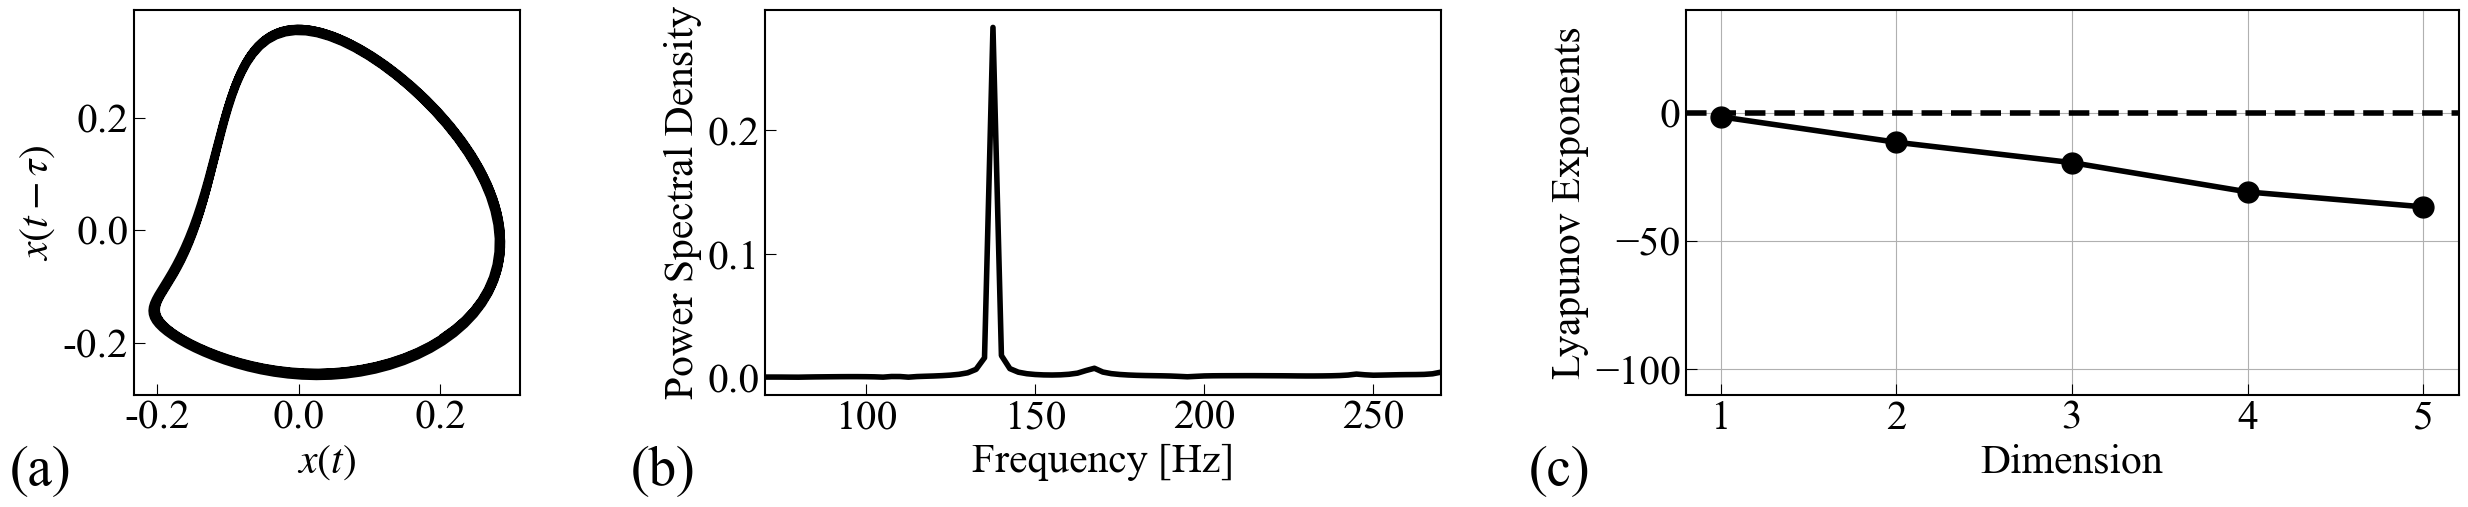

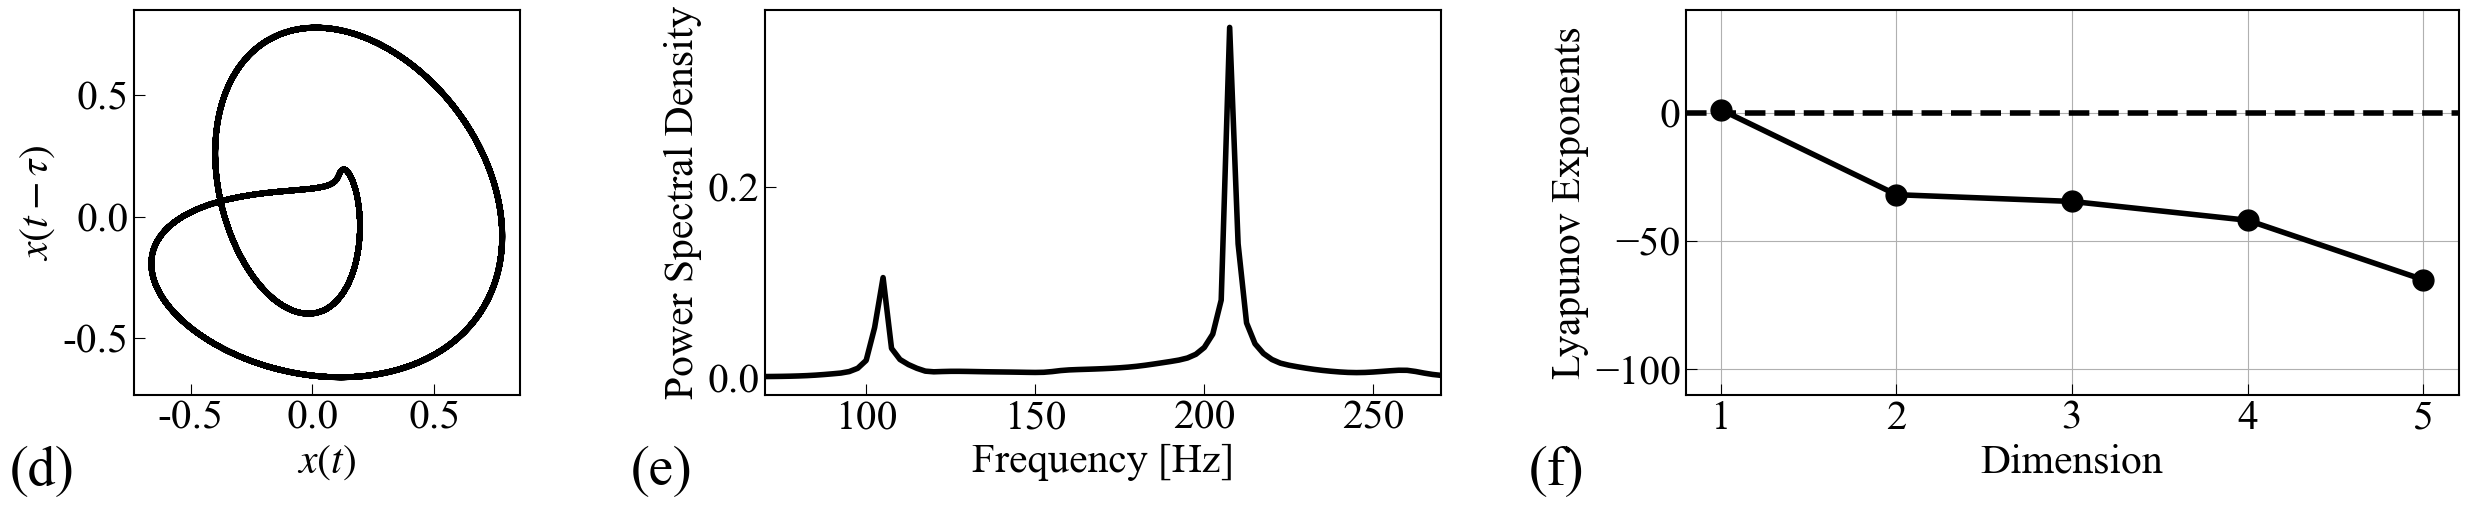

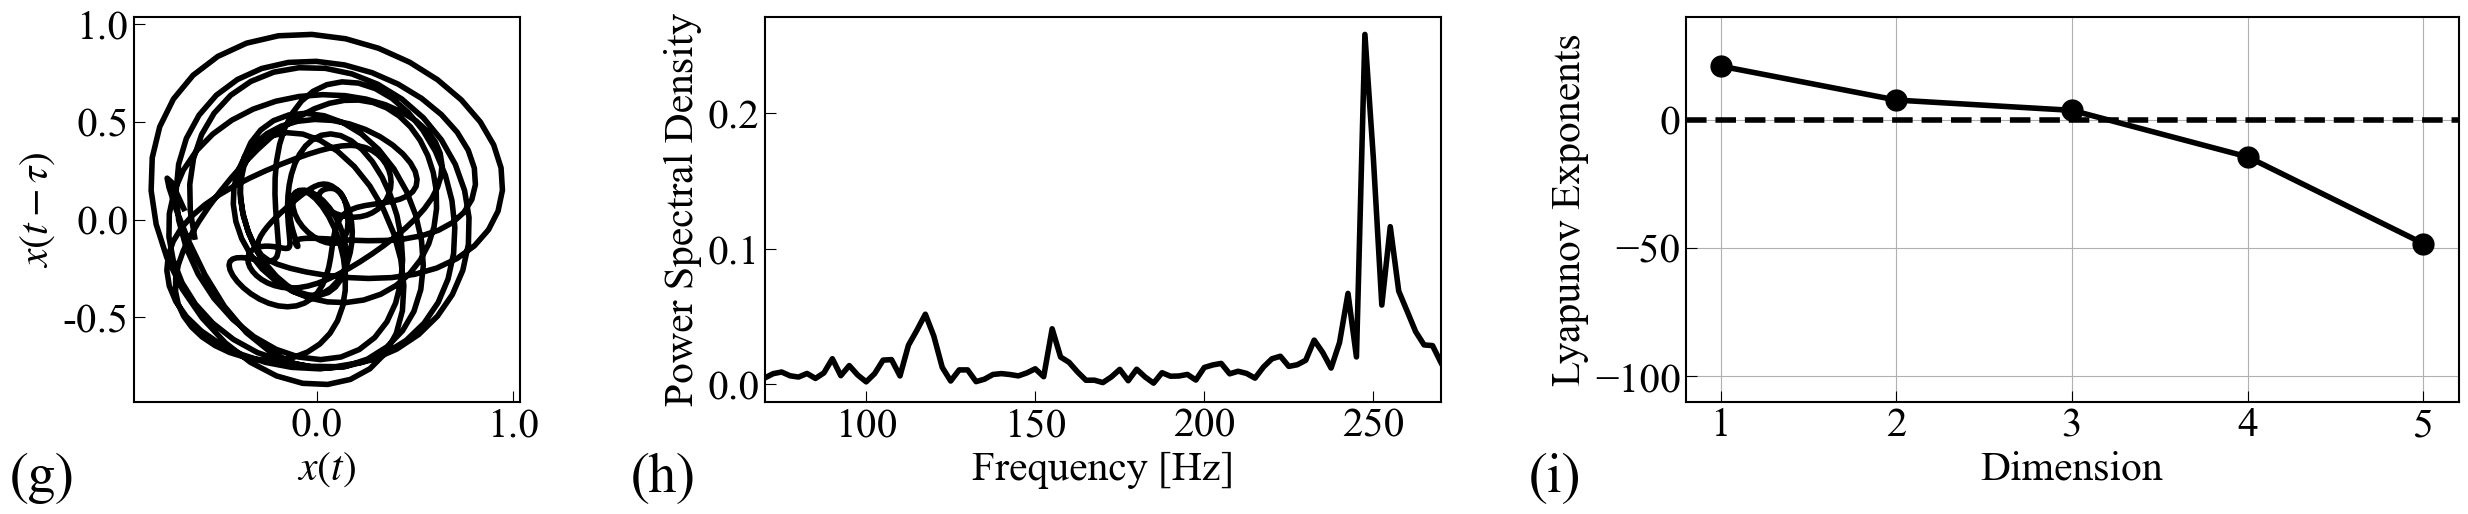

In [33]:
fig = NLP({
            'font.family':'Times New Roman',
            'mathtext.fontset':'stix',
            'font.size':30,
            'xtick.direction':'in',
            'ytick.direction':'in',
            'axes.linewidth':1.5,
            'xtick.major.size':8,
            'ytick.major.size':8,
            })

fig.figure04(data=esn1.freerun_ans[:, 0], t=test_t1, lyapunov_exponents=esn1.lyapunov_exponents, 
                figsize=(30, 5), width_ratios=[4, 7, 8], wspace=0.4,
                n_shift=20, n_initdel=2000, n_plt=3000, same_lim=True,
                freq_lim=(70, 270),
                n_dim=5, lyapunov_lim=(-110, 40), 
                title0=None, title1=None, title2=None, title_loc0='left', title_loc1='left', title_loc2='left', 
                xlabel0=r'$x(t)$', ylabel0=r'$x(t-\tau)$', linestyle0='-', c0='k', lw0=4,
                xlabel1='Frequency [Hz]', ylabel1='Power Spectral Density', linestyle1='-', c1='k', lw1=4,
                xlabel2='Dimension', ylabel2='Lyapunov Exponents', linestyle2_0line='dashed', c2_0line='k', lw2_0line=4,
                linestyle2='-', c2='k', lw2=4, marker='o', markersize=15,
                panel_list = ['(a)', '(b)', '(c)'], panel_xy_list=[(0.17, 0.95), (0.27, 0.95), (0.31, 0.95)], panel_fontsize=40, 
                save_png=None, save_eps=None)

fig.figure04(data=esn2.freerun_ans[:, 0], t=test_t2, lyapunov_exponents=esn2.lyapunov_exponents, 
                figsize=(30, 5), width_ratios=[4, 7, 8], wspace=0.4,
                n_shift=13, n_initdel=2000, n_plt=3000, same_lim=True,
                freq_lim=(70, 270),
                n_dim=5, lyapunov_lim=(-110, 40), 
                title0=None, title1=None, title2=None, title_loc0='left', title_loc1='left', title_loc2='left', 
                xlabel0=r'$x(t)$', ylabel0=r'$x(t-\tau)$', linestyle0='-', c0='k', lw0=4,
                xlabel1='Frequency [Hz]', ylabel1='Power Spectral Density', linestyle1='-', c1='k', lw1=4,
                xlabel2='Dimension', ylabel2='Lyapunov Exponents', linestyle2_0line='dashed', c2_0line='k', lw2_0line=4,
                linestyle2='-', c2='k', lw2=4, marker='o', markersize=15,
                panel_list = ['(d)', '(e)', '(f)'], panel_xy_list=[(0.17, 0.95), (0.27, 0.95), (0.31, 0.95)], panel_fontsize=40, 
                save_png=None, save_eps=None)

fig.figure04(data=esn3.freerun_ans[:, 0], t=test_t3, lyapunov_exponents=esn3.lyapunov_exponents, 
                figsize=(30, 5), width_ratios=[4, 7, 8], wspace=0.4,
                n_shift=9, n_initdel=0, n_plt=600, same_lim=True,
                freq_lim=(70, 270),
                n_dim=5, lyapunov_lim=(-110, 40), 
                title0=None, title1=None, title2=None, title_loc0='left', title_loc1='left', title_loc2='left', 
                xlabel0=r'$x(t)$', ylabel0=r'$x(t-\tau)$', linestyle0='-', c0='k', lw0=4,
                xlabel1='Frequency [Hz]', ylabel1='Power Spectral Density', linestyle1='-', c1='k', lw1=4,
                xlabel2='Dimension', ylabel2='Lyapunov Exponents', linestyle2_0line='dashed', c2_0line='k', lw2_0line=4,
                linestyle2='-', c2='k', lw2=4, marker='o', markersize=15,
                panel_list = ['(g)', '(h)', '(i)'], panel_xy_list=[(0.17, 0.95), (0.27, 0.95), (0.31, 0.95)], panel_fontsize=40, 
                save_png=None, save_eps=None)